In [ ]:
dataset = pd.read_csv('/content/Housing.csv')
dataset.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
dataset.shape

(545, 13)

In [ ]:
dataset.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [ ]:
dataset.info

<bound method DataFrame.info of         price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       no   

    hotwaterheating airconditioning  parking prefarea furnishingstatus  
0                no             yes        2      yes        furnished  
1                no             yes        3       no        furnished  
2                no              no        2      yes   semi-furnished  
3                no             yes        3      yes        furnished  
4                no             yes        2       no        furnished  
..              ...             ...      ...      ...              ...  
540              no              no        2       no      unfurnished  
541              no              no        0       no   semi-furnished  
542              no              no        0       no      unfurnished  
543              no              no        0       no        furnished  
544              no              no        0       no      unfurnished  

[545 rows x 13 columns]>

In [ ]:
dataset.describe

<bound method NDFrame.describe of     YearsExperience    Salary
0               1.1   39343.0
1               1.3   46205.0
2               1.5   37731.0
3               2.0   43525.0
4               2.2   39891.0
5               2.9   56642.0
6               3.0   60150.0
7               3.2   54445.0
8               3.2   64445.0
9               3.7   57189.0
10              3.9   63218.0
11              4.0   55794.0
12              4.0   56957.0
13              4.1   57081.0
14              4.5   61111.0
15              4.9   67938.0
16              5.1   66029.0
17              5.3   83088.0
18              5.9   81363.0
19              6.0   93940.0
20              6.8   91738.0
21              7.1   98273.0
22              7.9  101302.0
23              8.2  113812.0
24              8.7  109431.0
25              9.0  105582.0
26              9.5  116969.0
27              9.6  112635.0
28             10.3  122391.0
29             10.5  121872.0>

In [ ]:
X = dataset[['area']]
y = dataset[['price']]

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:
X_train.shape

(381, 1)

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [ ]:
print("b=",regressor.coef_)
print("a =",regressor.intercept_)

b= [[483.09973341]]
a = [2321120.21306872]


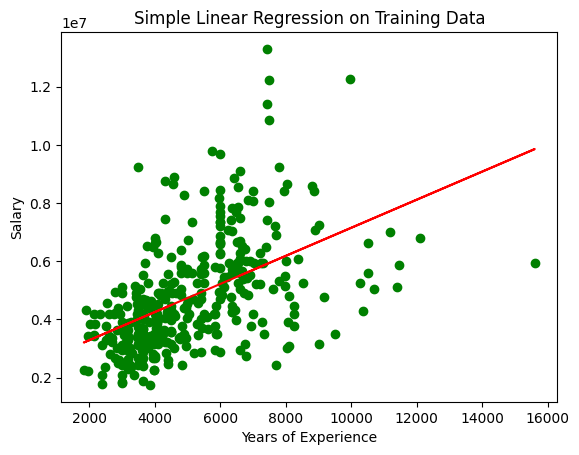

In [ ]:
plt.scatter(X_train,y_train,color='green')
plt.plot(X_train,regressor.predict(X_train),color='red')
# regressor.predict(x_train)  because it is predicted salaries for x_train
plt.title("Simple Linear Regression on Training Data")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

In [ ]:
y_pred = regressor.predict(X_test)

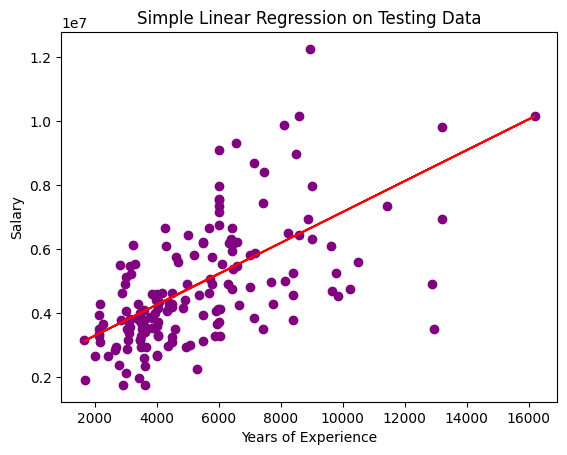

In [ ]:
plt.scatter(X_test,y_test,color='purple')
plt.plot(X_test,y_pred,color='red')
# y_pred  because it is predicted salaries for x_test
plt.title("Simple Linear Regression on Testing Data")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

In [ ]:
area_value =[[1650]]
y_pred= regressor.predict(area_value)
print(y_pred)

[[3118234.77319322]]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Regression Evaluation Metrics
Here are three common evaluation metrics for regression problems:

Mean Absolute Error (MAE) is the mean of the absolute value of the errors:



Mean Squared Error (MSE) is the mean of the squared errors:



Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors:



Comparing these metrics:

MAE is the easiest to understand, because it's the average error.
MSE is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units.
All of these are loss functions, because you want to minimize them.

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1128167.7726408413
MSE: 2259924878135.9487
RMSE: 1503304.6524693351


In [ ]:
import joblib as jb
jb.dump(regressor,'Linear regression_housing prices.pkl')

['Linear regression_housing prices.pkl']

In [ ]:
loaded_model = jb.load('Linear regression_housing prices.pkl')
predictions = loaded_model.predict(X_test)